In [267]:
from google.colab import drive

In [268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
%cd /content/drive/MyDrive/Heart disease kaggle

/content/drive/MyDrive/Heart disease kaggle


In [270]:
# --- Importing Libraries ---
import numpy as np # Numpy stands for numerical python for array or matrics
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # Unified interface for creating different types of plots.
import seaborn as sns
import warnings
import os
import yellowbrick # Visual diagnostic tools called "Visualizers" 

from matplotlib.collections import PathCollection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

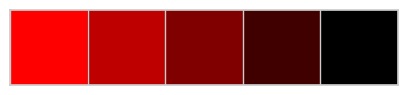

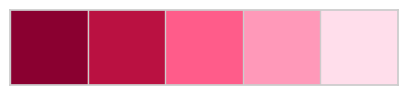

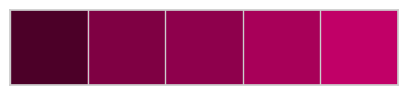

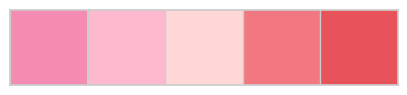

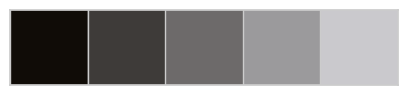

In [271]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [272]:
# --- Importing Dataset ---
df = pd.read_csv("/content/drive/MyDrive/Heart disease kaggle/Data Train Heart Disease.csv") #DF means dataframe

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [273]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 303
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)

In [274]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Kolom yang berisi hanya angka 0,1,2,3 dianggap object
df[lst] = df[lst].astype(object) # Change columns data type to object 
df.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)

In [275]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

*************************
.: Sex (Gender) Total :.
*************************


1    207
0     96
Name: sex, dtype: int64

In [276]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

******************************
.: Chest Pain Type Total :.
******************************


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [277]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

********************************
.: Fasting Blood Sugar Total :.
********************************


0    258
1     45
Name: fbs, dtype: int64

In [278]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    152
0    147
2      4
Name: restecg, dtype: int64

In [279]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    204
1     99
Name: exang, dtype: int64

In [280]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

********************
.: Slope Total :.
********************


2    142
1    140
0     21
Name: slope, dtype: int64

In [281]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

****************************************
.: Number of Major Vessels Total :.
****************************************


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [282]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

********************
.: "thal" Total :.
********************


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [283]:
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    165
0    138
Name: target, dtype: int64

In [284]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000
target,303.000000,0.544554,0.498835,0.000000,0.000000,1.000000,1.000000,1.000000


In [285]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.202
Kurtosis: -0.542




<Figure size 1200x1200 with 0 Axes>

In [286]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.714
Kurtosis: 0.929




<Figure size 1200x1200 with 0 Axes>

In [287]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.143
Kurtosis: 4.505




<Figure size 1200x1200 with 0 Axes>

In [288]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.537
Kurtosis: -0.062




<Figure size 1200x1200 with 0 Axes>

In [289]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.270
Kurtosis: 1.576




<Figure size 1200x1200 with 0 Axes>

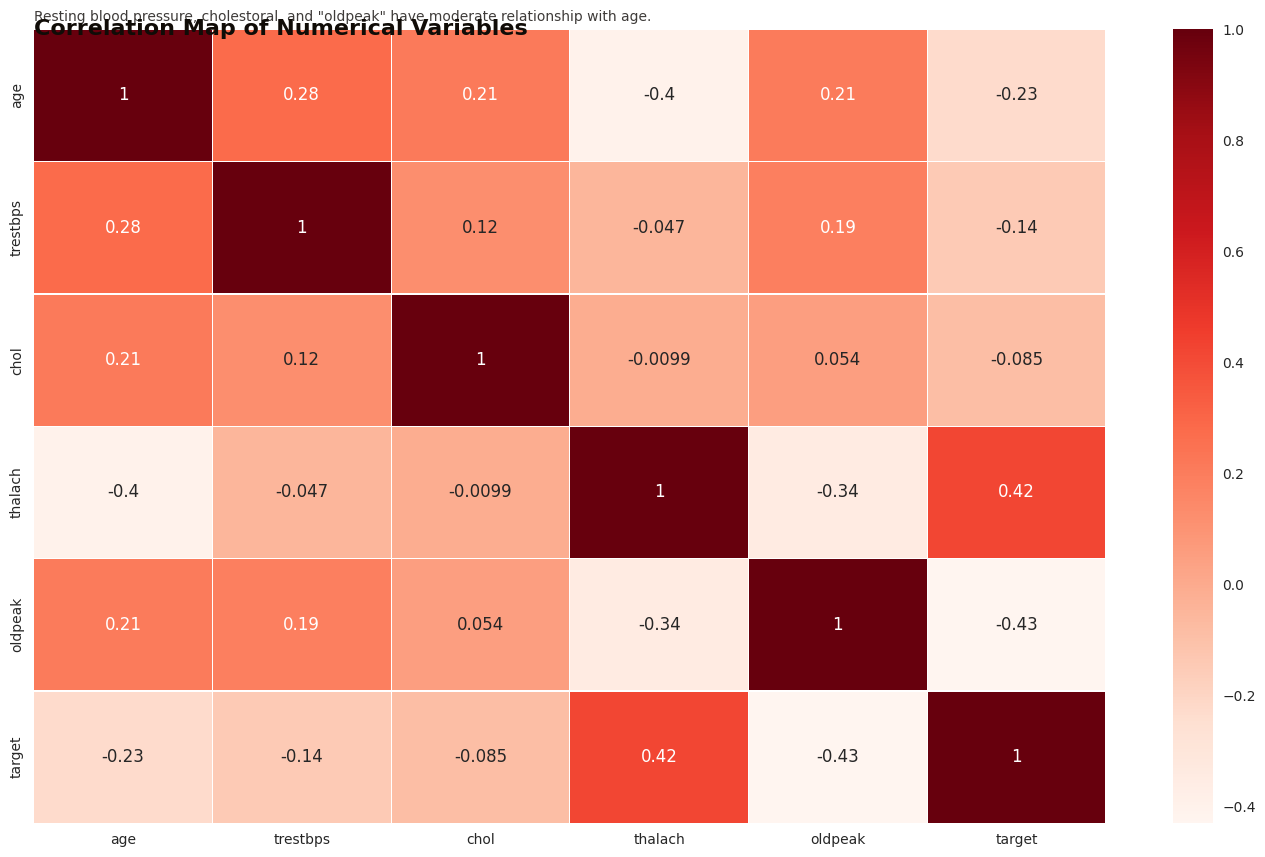

In [290]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [291]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [292]:
# Scaling data atas sampe bawah
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)
# Data values now range from 0 to 1 after min-max normalization. 
print(minimum)
print(maximum)
df.head()

0.0
6.2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [293]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1) # axis=1 means columns, jadi ilangin kolom target. Kalo axis=0 itu baris
y = df['target']
print(x)

          age sex cp  trestbps      chol fbs restecg   thalach exang  \
0    0.708333   1  3  0.481132  0.244292   1       0  0.603053     0   
1    0.166667   1  2  0.339623  0.283105   0       1  0.885496     0   
2    0.250000   0  1  0.339623  0.178082   0       0  0.770992     0   
3    0.562500   1  1  0.245283  0.251142   0       1  0.816794     0   
4    0.583333   0  0  0.245283  0.520548   0       1  0.702290     1   
..        ...  .. ..       ...       ...  ..     ...       ...   ...   
298  0.583333   0  0  0.433962  0.262557   0       1  0.396947     1   
299  0.333333   1  3  0.150943  0.315068   0       1  0.465649     0   
300  0.812500   1  0  0.471698  0.152968   1       1  0.534351     0   
301  0.583333   1  0  0.339623  0.011416   0       1  0.335878     1   
302  0.583333   0  1  0.339623  0.251142   0       0  0.786260     0   

      oldpeak slope ca thal  
0    0.370968     0  0    1  
1    0.564516     0  0    2  
2    0.225806     2  0    2  
3    0.129032  

In [294]:
df.to_csv('Data Train Scaled.csv', index=False)

In [295]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
# print(x_test)

In [296]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
dt_clf = DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

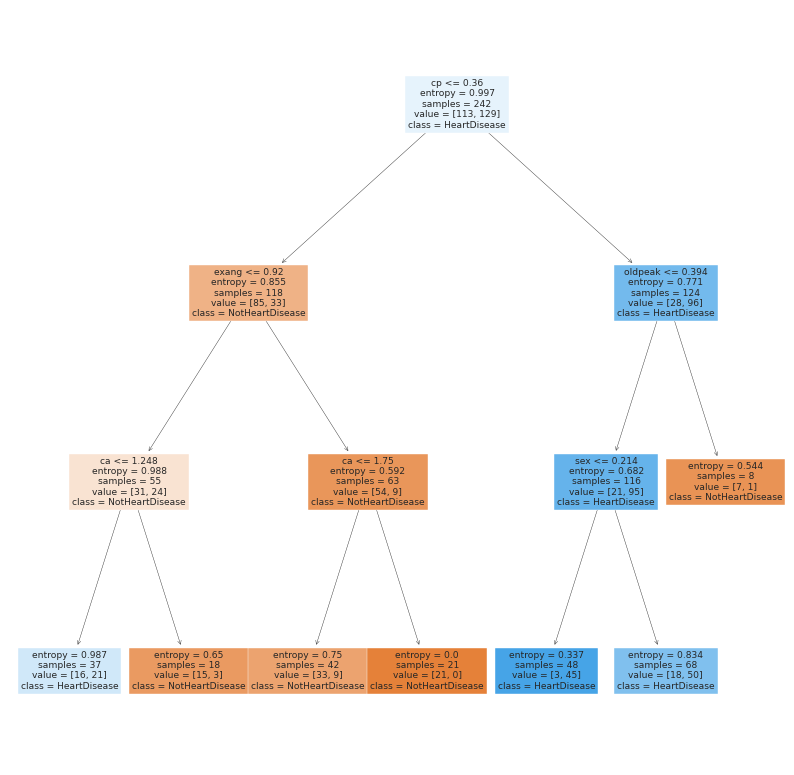

In [297]:
feature_names = ["age","sex","cp", "trestbps", "chol", "fbs", "restecg","thalach","exang","oldpeak","slope","ca","thal"]
class_names = ["NotHeartDisease", "HeartDisease"]

fig = plt.figure(figsize=(10,10))
plot = plot_tree(dt_clf, 
               feature_names=feature_names,
               class_names=class_names,
               filled=True)

.:. Decision Tree Accuracy: 83.61% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61


.: Performance Evaluation
**************************


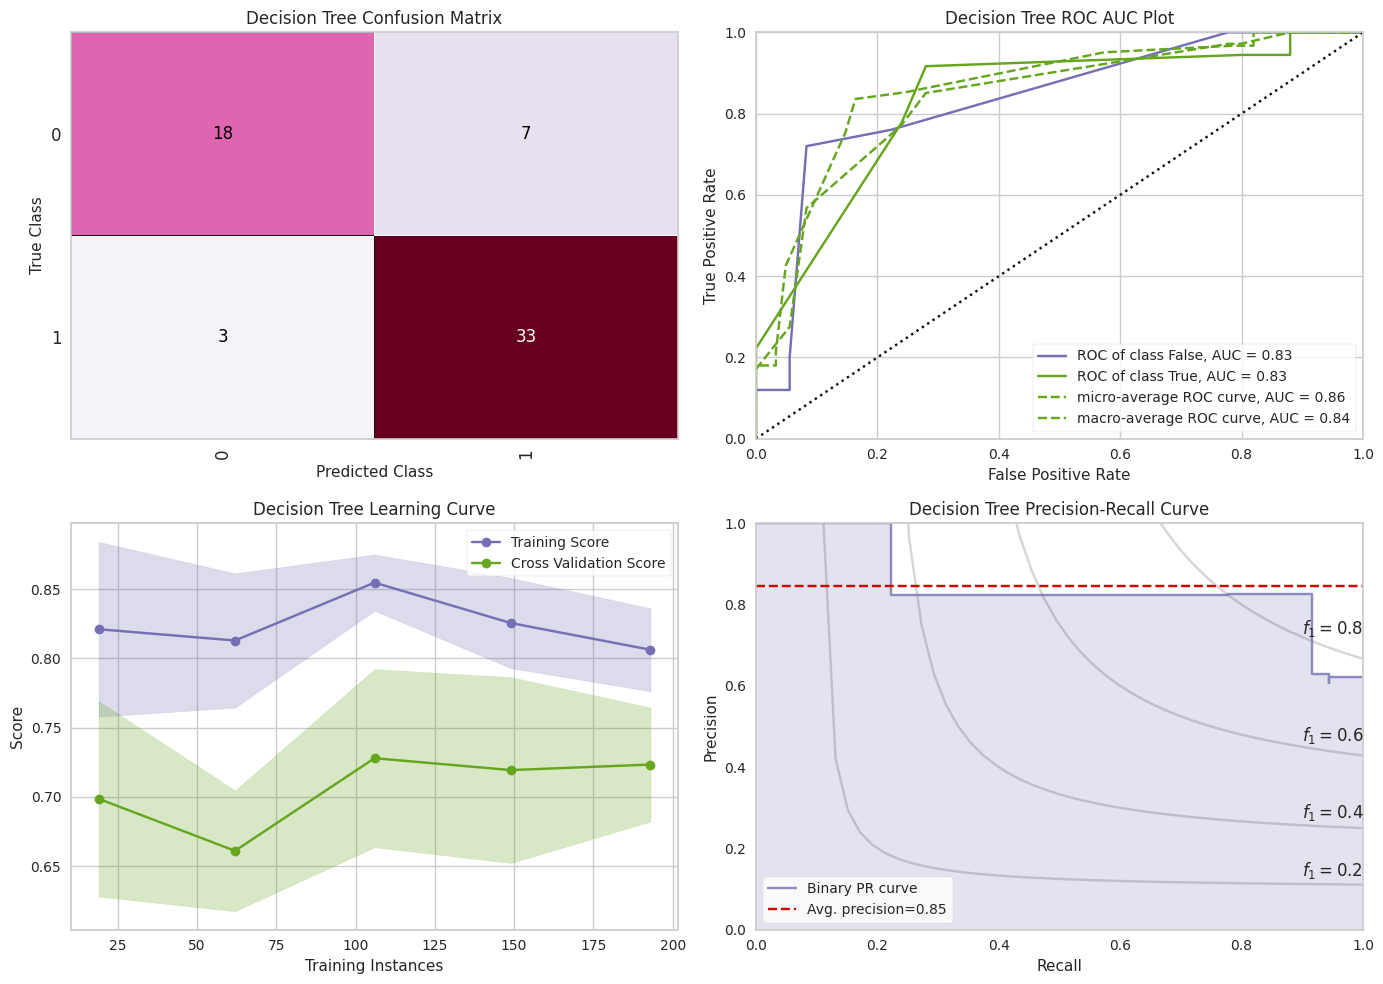

In [298]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();


In [299]:
# --- Import Prediction ---
prediction = pd.read_csv("/content/drive/MyDrive/Heart disease kaggle/Prediksi Heart Disease.csv")

# --- Reading Prediction Dataset ---
prediction.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
32,0,3,145,233,1,0,136,0,2.300000,0,0,1
41,1,2,130,250,0,1,146,0,3.500000,0,0,2
59,0,1,130,204,0,0,167,0,1.400000,2,0,2
58,1,1,120,236,0,1,141,0,0.800000,2,0,2
43,0,0,120,354,0,1,153,1,0.600000,2,0,2


In [300]:
# Ini scaling lengkap dari atas sampe bawah
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in cols:
    minimum = min(prediction[col])
    maximum = max(prediction[col])
    prediction[col] = (df[col] - minimum) / (maximum - minimum)
# Data values now range from 0 to 1 after min-max normalization. 
prediction.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.682292,0,3,-0.882253,-0.287113,1,0,-2.156616,0,0.059834,0,0,1
1,-0.695833,1,2,-0.883588,-0.287025,0,1,-2.151908,0,0.091051,0,0,2
2,-0.693750,0,1,-0.883588,-0.287265,0,0,-2.153817,0,0.036420,2,0,2
3,-0.685937,1,1,-0.884478,-0.287098,0,1,-2.153053,0,0.020812,2,0,2
4,-0.685417,0,0,-0.884478,-0.286483,0,1,-2.154962,1,0.015609,2,0,2


In [301]:
# --- Prediction using Random Forest ---
result = DTCclassifier.predict(prediction)
prediction['Hasil'] = result
print(prediction)
prediction.to_csv('Hasil Prediksi.csv', index=False)

# --- Print Heart Disease Status ---
# if result[0] == 1:
#   print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
# else:
#   print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m')

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0   -0.682292    0   3 -0.882253 -0.287113    1        0 -2.156616      0   
1   -0.695833    1   2 -0.883588 -0.287025    0        1 -2.151908      0   
2   -0.693750    0   1 -0.883588 -0.287265    0        0 -2.153817      0   
3   -0.685937    1   1 -0.884478 -0.287098    0        1 -2.153053      0   
4   -0.685417    0   0 -0.884478 -0.286483    0        1 -2.154962      1   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
298 -0.685417    0   0 -0.882698 -0.287072    0        1 -2.160051      1   
299 -0.691667    1   3 -0.885368 -0.286952    0        1 -2.158906      0   
300 -0.679688    1   0 -0.882342 -0.287322    1        1 -2.157761      0   
301 -0.685417    1   0 -0.883588 -0.287645    0        1 -2.161069      1   
302 -0.685417    0   1 -0.883588 -0.287098    0        0 -2.153562      0   

      oldpeak  slope  ca  thal  Hasil  
0    0.059834      0   0     1     